In [143]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [144]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [145]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [146]:
#boston['MEDV'] = boston_dataset.target

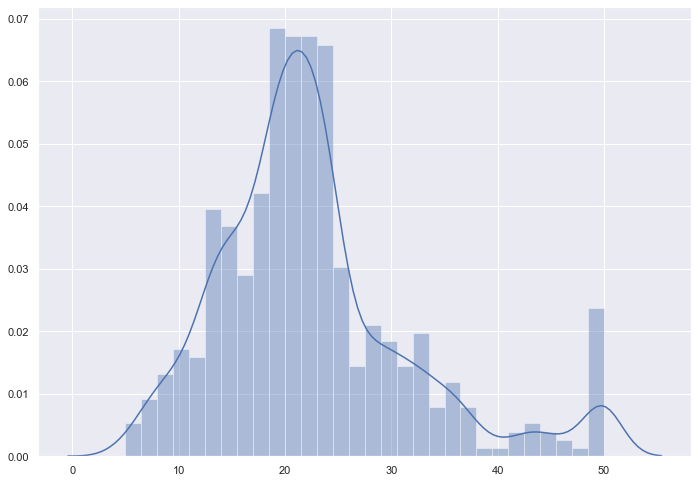

In [162]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston_dataset.target, bins=30)
plt.show()

In [148]:
from sklearn.model_selection import train_test_split


#Y = boston['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(boston, boston_dataset.target, test_size = 0.2, random_state=5)

In [149]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))



print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 4.741000992236516


The model performance for testing set
--------------------------------------
RMSE is 4.568292042303193


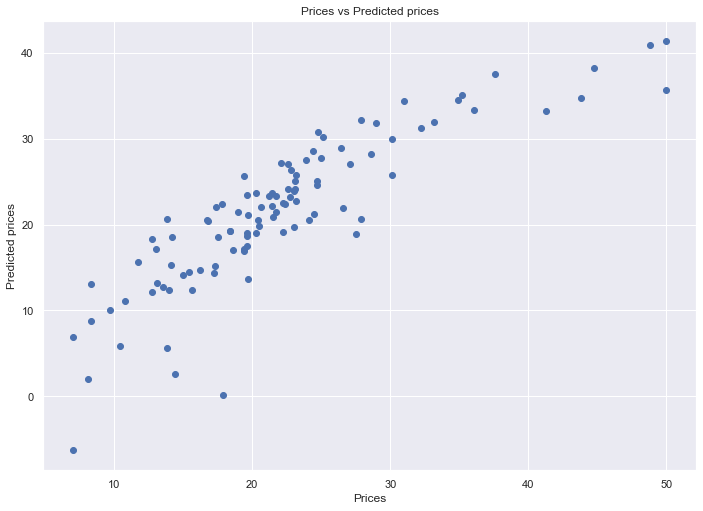

In [152]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.scatter(Y_test, y_test_predict)
plt.show()

In [157]:
def gradient_descent(Y_test,Y_predict,learning_rate,iteration=100,theta=100):
    conc=[x for x in range(iteration)]
    conc[0]=theta;
    for i in range(100):
        theta = theta - learning_rate * sklearn.metrics.mean_squared_error(Y_test, Y_predict)
        conc[i] = (theta)
    plt.scatter(conc, [x for x in range(iteration)])
    plt.show()

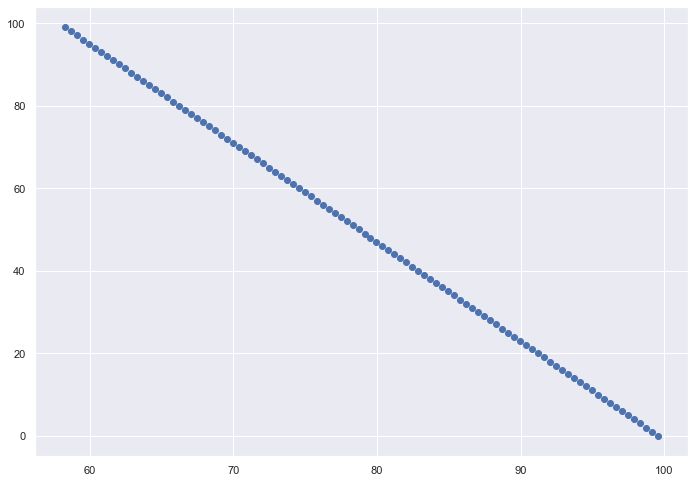

In [158]:
gradient_descent(Y_test,y_test_predict,0.02)

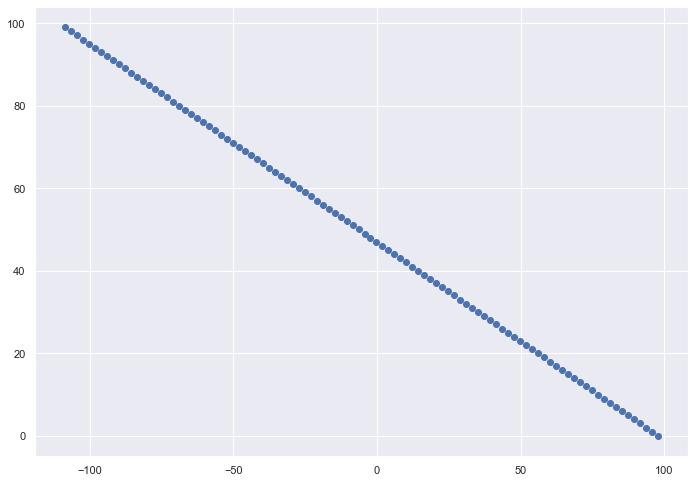

In [159]:
gradient_descent(Y_test,y_test_predict,0.1)

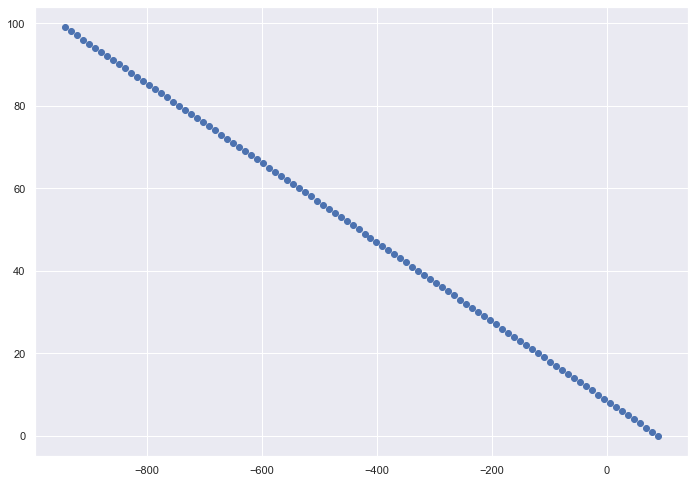

In [160]:
gradient_descent(Y_test,y_test_predict,0.5)